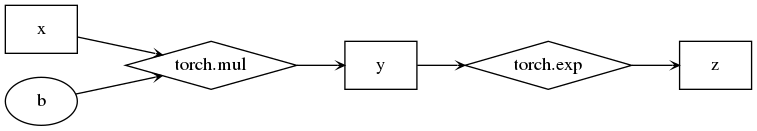

In [2]:
from graphviz import Digraph
from IPython.display import display, Image
dot = Digraph(comment='计算图', format='png')
dot.graph_attr['rankdir'] = 'LR'
dot.edge_attr.update(arrowhead='vee', arrowsize='0.5')
dot.node('x', 'x', shape='box')
dot.node('mult', 'torch.mul', shape='diamond')
dot.node('y', 'y', shape='box')
dot.node('z', 'z', shape='box')
dot.node('exp', 'torch.exp', shape='diamond')
dot.node('b', 'b')
dot.edges([['b', 'mult'],['x','mult'],['mult','y'],['y','exp'],['exp','z']])
Image(dot.render('pic/compute_graph.gv'))

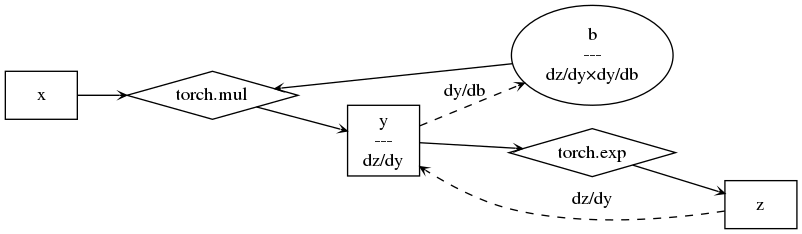

In [50]:
dot = Digraph(comment='计算图-反向', format='png')
dot.graph_attr['rankdir'] = 'LR'
dot.edge_attr.update(arrowhead='vee', arrowsize='0.5')
dot.node('x', 'x', shape='box')
dot.node('b', r'b\n --- \ndz/dy×dy/db')
dot.node('y', r'y\n --- \ndz/dy', shape='box')
dot.node('z', 'z', shape='box')
dot.node('exp', 'torch.exp', shape='diamond')
dot.node('mult', 'torch.mul', shape='diamond')
dot.edges([['b', 'mult'],['x','mult'],['mult','y'],['y','exp'],['exp','z']])
dot.edge('z','y', label='dz/dy', style='dashed')
dot.edge('y','b', label='dy/db', style='dashed')
Image(dot.render('pic/compute_graph_back.gv'))

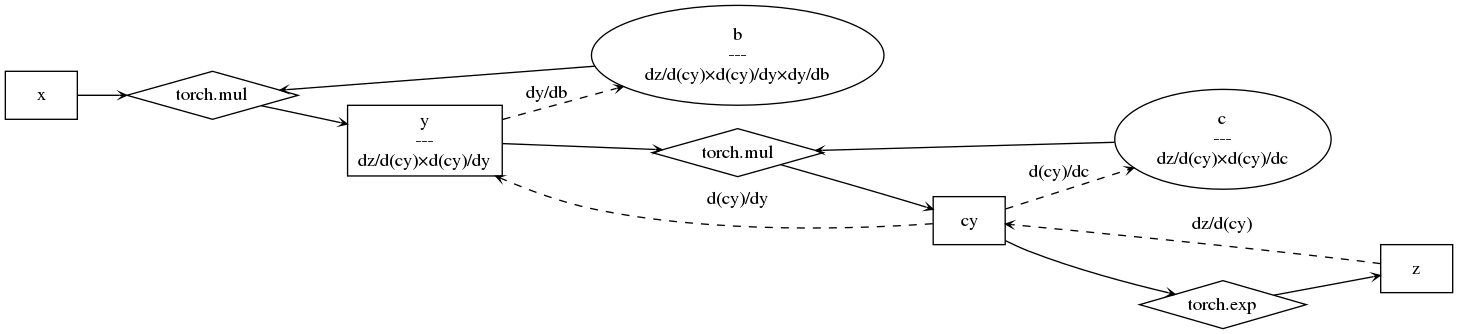

In [58]:
dot = Digraph(comment='计算图-反向', format='png')
dot.graph_attr['rankdir'] = 'LR'
dot.edge_attr.update(arrowhead='vee', arrowsize='0.5')
dot.node('x', 'x', shape='box')
dot.node('b', r'b\n --- \ndz/d(cy)×d(cy)/dy×dy/db')
dot.node('y', r'y\n --- \ndz/d(cy)×d(cy)/dy', shape='box')
dot.node('z', 'z', shape='box')
dot.node('c', r'c\n --- \ndz/d(cy)×d(cy)/dc')
dot.node('cy', r'cy', shape='box')
dot.node('exp', 'torch.exp', shape='diamond')
dot.node('mult', 'torch.mul', shape='diamond')
dot.node('mult2', 'torch.mul', shape='diamond')
dot.edges([['b', 'mult'],['x','mult'],['mult','y'],['y','mult2'],['c','mult2'],['mult2','cy'],['cy','exp'],['exp','z']])
dot.edge('cy','y', label='d(cy)/dy', style='dashed')
dot.edge('y','b', label='dy/db', style='dashed')
dot.edge('z','cy', label='dz/d(cy)', style='dashed')
dot.edge('cy','c', label='d(cy)/dc', style='dashed')
Image(dot.render('pic/compute_graph_back2.gv'))

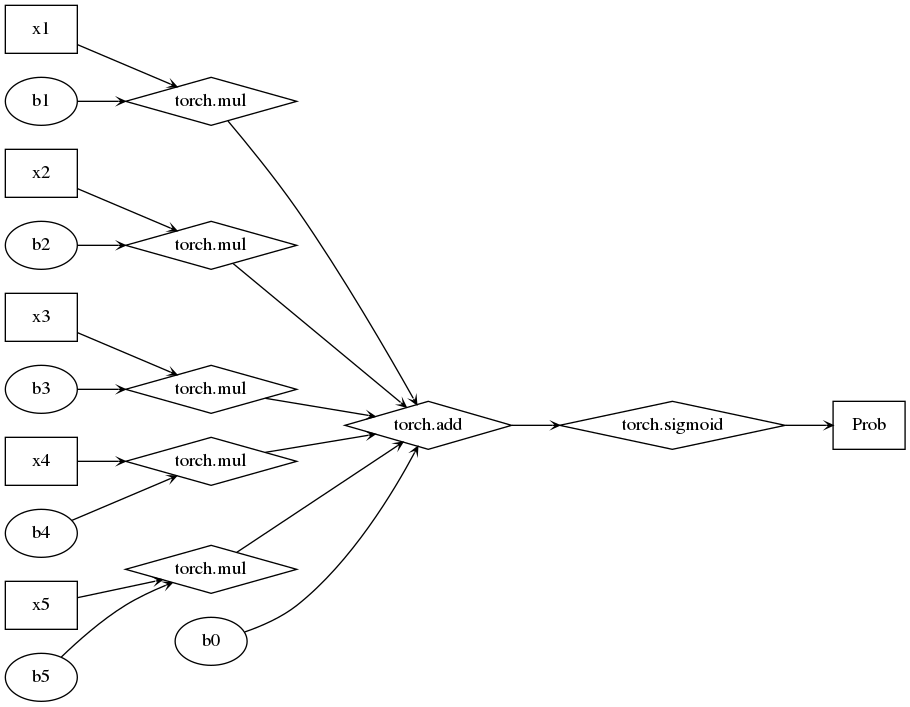

In [13]:
dot = Digraph(comment='Logistic', format='png')
dot.graph_attr['rankdir'] = 'LR'
dot.edge_attr.update(arrowhead='vee', arrowsize='0.5')
dot.node('x1', 'x1', shape='box')
dot.node('b1', r'b1')
dot.node('mul1', 'torch.mul', shape='diamond')
dot.node('x2', 'x2', shape='box')
dot.node('b2', r'b2')
dot.node('mul2', 'torch.mul', shape='diamond')
dot.node('x3', 'x3', shape='box')
dot.node('b3', r'b3')
dot.node('mul3', 'torch.mul', shape='diamond')
dot.node('x4', 'x4', shape='box')
dot.node('b4', r'b4')
dot.node('mul4', 'torch.mul', shape='diamond')
dot.node('x5', 'x5', shape='box')
dot.node('b5', r'b5')
dot.node('mul5', 'torch.mul', shape='diamond')
dot.node('b', r'b0')
dot.node('add', 'torch.add', shape='diamond')
dot.node('sigmoid', 'torch.sigmoid', shape='diamond')
dot.node('p', 'Prob', shape='box')
dot.edges([['x1','mul1'],['b1','mul1']])
dot.edges([['x2','mul2'],['b2','mul2']])
dot.edges([['x3','mul3'],['b3','mul3']])
dot.edges([['x4','mul4'],['b4','mul4']])
dot.edges([['x5','mul5'],['b5','mul5']])
dot.edges([['b','add'],['mul1','add'],['mul2','add'],['mul3','add'],['mul4','add'],['mul5','add']])
dot.edge('add','sigmoid')
dot.edge('sigmoid','p')
Image(dot.render('pic/compute_graph_Logistic.gv'))

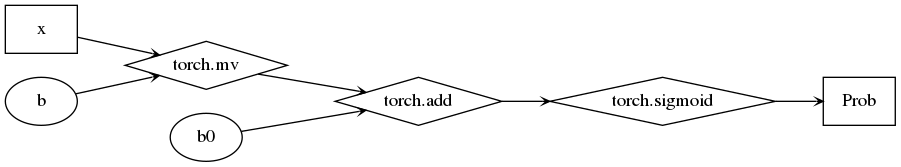

In [14]:
dot = Digraph(comment='Logistic', format='png')
dot.graph_attr['rankdir'] = 'LR'
dot.edge_attr.update(arrowhead='vee', arrowsize='0.5')
dot.node('x', 'x', shape='box')
dot.node('bv', r'b')
dot.node('mv', 'torch.mv', shape='diamond')
dot.node('b', r'b0')
dot.node('add', 'torch.add', shape='diamond')
dot.node('sigmoid', 'torch.sigmoid', shape='diamond')
dot.node('p', 'Prob', shape='box')
dot.edges([['x','mv'],['bv','mv']])
dot.edges([['b','add'],['mv','add']])
dot.edge('add','sigmoid')
dot.edge('sigmoid','p')
Image(dot.render('pic/compute_graph_Logistic2.gv'))